<html>
<h1  align="center"> 
    <hr>
    <img align="center;" style="background-color:
#253bff"; color:"#ff5d25";" src="https://www.tensorflow.org/images/tf_logo_social.png?hl=es-419"; width="60%"; height="40%">

</h1>
</html>
                                                                                                                           
<h3 align="center">Entrenando un modelo para predecir imagenes.
</h3>
                  
                  
<h1 align="center">Indice del analisis</h1>

- [**Librerias**](#Librerias)
- [**Modelo desde el Metodo**](#Modelo-desde-el-Metodo)
- [**Modelo Manual**](#Modelo-Manual)

<html><h1 align="center", style="background: #414ce8; color:white">Librerias</h1></html>

[**Volver al Inicio**](#Indice-del-analisis)

In [1]:
import tensorflow as tf
import network
import pprint
import matplotlib.pyplot as plt

<html><h1 align="center", style="background: #414ce8; color:white">Modelo desde el Metodo</h1></html>

[**Volver al Inicio**](#Indice-del-analisis)

PROBAR para este caso:

Desea escalar los valores? (Si/No) Si

Ingrese la cantidad de Neuronas: 128

Ingrese la cantidad de Outputs:  10

Ingrese la cantidad de Capas Ocultas: (Maximo 3) 3

In [2]:
# Se instancia la clase Model

object = network.Model()

# Se almacenan los imputs para el modelo

valores = object._input()



Desea entrenar una Red Neuronal? (Si/No): 
 Si
Desea escalar los valores? (Si/No) Si
Ingrese la cantidad de Neuronas: 128
Ingrese la cantidad de Outputs: 10
Ingrese la cantidad de Capas Ocultas: 15
Ingrese la cantidad de Epocas: 30


La cantidad de Capas es: 15 
La cantidad de Neuronas es: 128 
La cantidad de Epocas es: 30 


In [3]:
# Se entrena el modelo en base a los inputs
if valores != None:
    mnist = tf.keras.datasets.mnist.load_data()

    (x_train, y_train), (x_test, y_test) = mnist

    model = object._get_model(inputs = valores, data = mnist)
    
    # Resultados

    pprint.pprint(model.history)
else:
    print('Ejecuar valores para obtener los inputs')

Añadiendo capa Numero 1 al Modelo
Añadiendo capa Numero 2 al Modelo
Añadiendo capa Numero 3 al Modelo
Añadiendo capa Numero 4 al Modelo
Añadiendo capa Numero 5 al Modelo
Añadiendo capa Numero 6 al Modelo
Añadiendo capa Numero 7 al Modelo
Añadiendo capa Numero 8 al Modelo
Añadiendo capa Numero 9 al Modelo
Añadiendo capa Numero 10 al Modelo
Añadiendo capa Numero 11 al Modelo
Añadiendo capa Numero 12 al Modelo
Añadiendo capa Numero 13 al Modelo
Añadiendo capa Numero 14 al Modelo
Añadiendo capa Numero 15 al Modelo

INPUTS:
Capas:     15
Neuronas: 128
Outputs:  10
Scaler:   si


Entrenando el modelo.....

Por default: Optimizer adam, loss: categorical, metrics: accuracy 


Perdida:  [1.084, 0.284, 0.187, 0.143, 0.108, 0.089, 0.076, 0.067, 0.055, 0.054, 0.047, 0.04, 0.034, 0.029, 0.032, 0.029, 0.028, 0.025, 0.02, 0.025, 0.02, 0.022, 0.02, 0.017, 0.017, 0.019, 0.019, 0.021, 0.021, 0.015] 
Accuracy: [0.604, 0.919, 0.947, 0.96, 0.97, 0.976, 0.979, 0.982, 0.985, 0.985, 0.987, 0.989, 0.991, 0.992

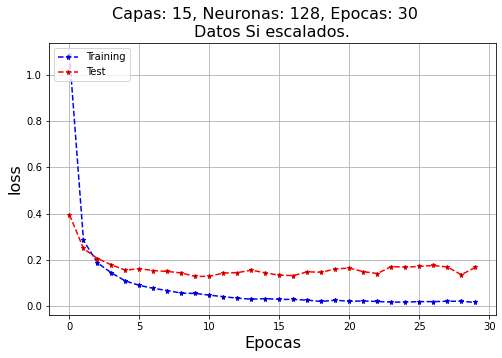

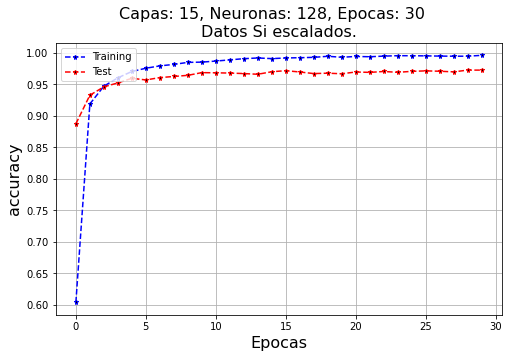

In [4]:
# Graficos
try:
    if model.history != None:
        object._get_plots(model.history['loss'], model.history['val_loss'],hyper_p = valores, y_label = 'loss')
        object._get_plots(model.history['accuracy'], model.history['val_accuracy'],valores, y_label = 'accuracy')
    else:
        print('Ejecuar valores para obtener los inputs')
except Exception as e:
    print(e)

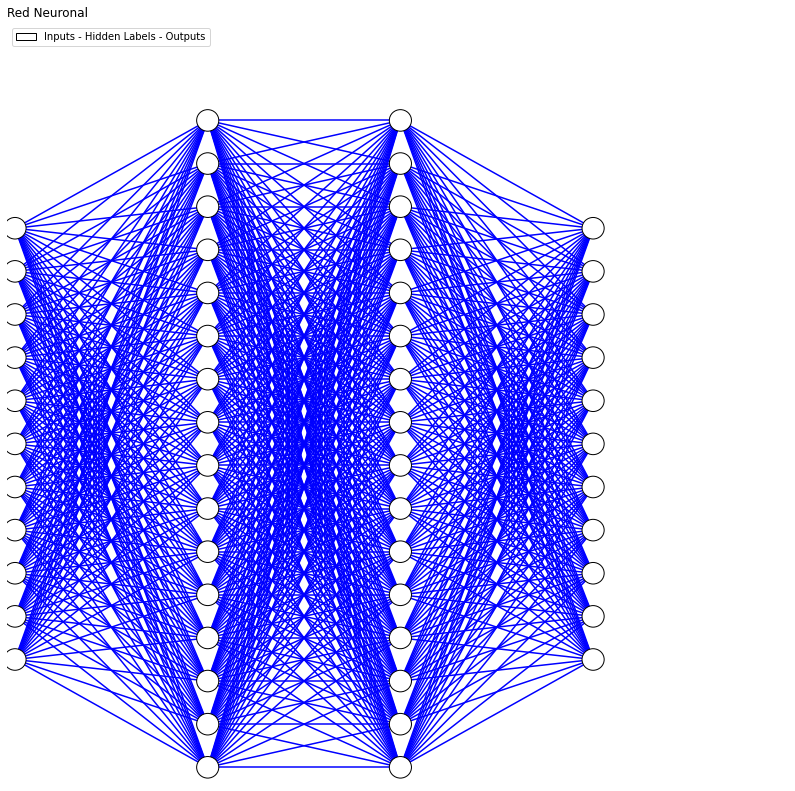

In [5]:
fig = plt.figure(figsize=(14, 14))
ax = fig.gca()
ax.axis('off')
object._draw_neural_net(ax, .01, .75, .05, .9, [10, 15, 15, 10])
plt.title('Red Neuronal', loc = 'left')
fig.savefig('nn.png')

<html><h1 align="center", style="background: #414ce8; color:white">Modelo Manual</h1></html>

[**Volver al Inicio**](#Indice-del-analisis)

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Ejemplo de uno de los tensores que se utilizara
para entrenar el modelo

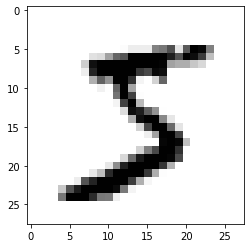

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

A continuacion se observan los arrays y sus respectivos valores de escala entre blanco y negro para las primeras 8 filas de 28

In [9]:
print('Tamaño: ',x_train[0].shape)
print('Tensor: ')
x_train[0][0:8]

Tamaño:  (28, 28)
Tensor: 


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Construccion del modelo

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

model = tf.keras.models.Sequential()
# Se adicionan dos capas ocultas
model.add(tf.keras.layers.Flatten())
# Se agregan 128 neuronas a la capa con una funcion de activacion llamada relu predeterminada de keras
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Se utiliza softmax para la funcion de activacion
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Las redes neuronales siempre estan tratando de minimizar las perdidas

model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

# Utilizamos 3 epocas

historial = model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6991 - accuracy: 0.8776
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.9281
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2199 - accuracy: 0.9447


In [11]:
historial.history

{'loss': [1.6990509033203125, 0.36623501777648926, 0.21989010274410248],
 'accuracy': [0.8775666952133179, 0.9281166791915894, 0.9447166919708252]}

Podemos observar que a partir de la tercer iteración la perdida tiende a estabilizarse y el accuracy llega a un maximo en la sexta

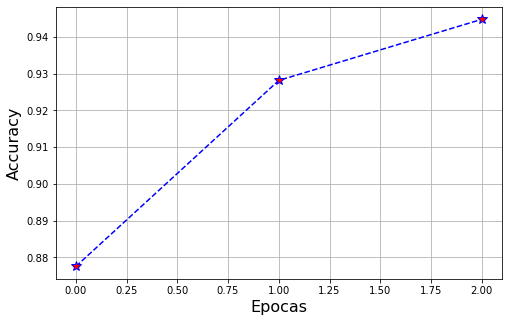

In [12]:
plt.figure(figsize = (8,5))
plt.plot(historial.history['accuracy'], color = 'blue', linestyle = 'dashed', marker = '*', markerfacecolor = 'red', markersize = 10)
plt.xlabel('Epocas', fontsize=16); plt.ylabel('Accuracy', fontsize=16)
plt.grid(); plt.show()

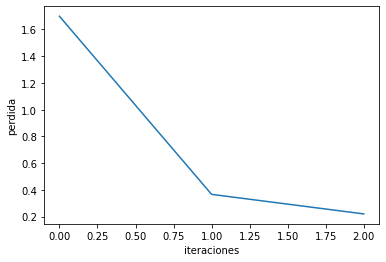

In [13]:
plt.xlabel('iteraciones')
plt.ylabel('perdida')
plt.plot(historial.history['loss']);

In [14]:
prediccion = model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


A simple vista se puede visualizar que el primer array es un 7

In [15]:
from termcolor import colored

longitud = x_train[0].shape[0]
x_test   = tf.keras.utils.normalize(x_test, axis = 1)
for i in range(longitud):
    array = x_test[0][i]
    array = [1 if  i > 0 else 0 for i in array]
    #print(' '.join(str(e) for e in array))
    print(' '.join(colored(e, 'red') if e == 1 else colored(e, 'blue') for e in array))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 

Prediccion de la imagen

            Prediccion:  7


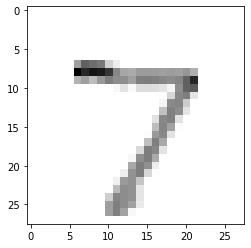

In [16]:
import numpy as np

for i in range(0, 1):
    # Argmax retorna el indice del numero mas grande en el array
    imagen = np.argmax(prediccion[i])
    print('            Prediccion: ',imagen)
    plt.imshow(x_test[i], cmap = plt.cm.binary)
    plt.show()

Con datos Escalados:

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

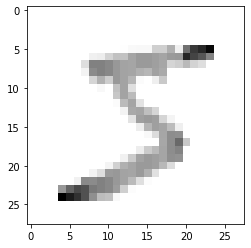

In [18]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

historial = model.fit(x_train,
                  y_train,
                  epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2647 - accuracy: 0.9222
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1076 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9771


Podemos observar que a partir de la iteracion numero 10 la perdida tiende a estabilizarse

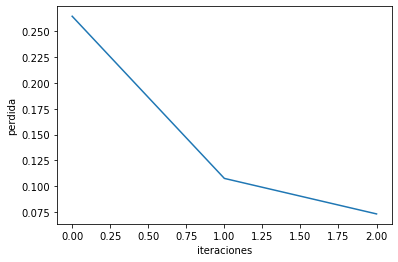

In [20]:
plt.xlabel('iteraciones')
plt.ylabel('perdida')
plt.plot(historial.history['loss']);

            Prediccion:  7


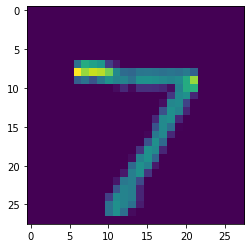

            Prediccion:  2


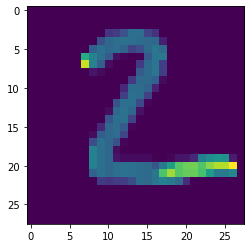

            Prediccion:  1


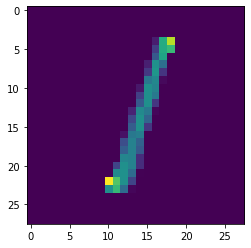

In [21]:
import numpy as np

for i in range(0, 3):
    # Argmax retorna el indice del numero mas grande en el array
    imagen = np.argmax(prediccion[i])
    print('            Prediccion: ',imagen)
    plt.imshow(x_test[i])
    plt.show()